In [1]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''
import os
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Convolution2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/temporary/Downloads/train'
test_dir  = '/home/temporary/Downloads/test'

datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2)

nb_train_samples = 200
nb_test_samples = 50
# batch_size = 25
batch_size = 2
num_classes = 7
epochs = 30
width =300
height = 300

training_generator = datagen.flow_from_directory(train_dir,
    target_size=(width, height),
    batch_size=20,
    class_mode="categorical")

testing_generator = datagen.flow_from_directory(test_dir,
    target_size=(width, height),
    batch_size=20,
    class_mode="categorical")


# input image dimensions
# img_rows, img_cols = 28, 28


# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print (x_train.shape)


if K.image_data_format() == 'channels_first':
#     x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (3, width, height)
else:
#     x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#     x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (width, height, 3)



# if K.image_data_format() == 'channels_first':
#     x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#     x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)

# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')

# x_train /= 255
# x_test /= 255
# print('x_train shape:', x_train.shape)
# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')

# # convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

checkpoint = ModelCheckpoint(saved_weights_name, 
                                     monitor='val_loss', 
                                     verbose=1, 
                                     save_best_only=True, 
                                     mode='min', 
                                     period=1)
tensorboard = TensorBoard(log_dir=os.path.expanduser('~/logs/'), 
                                  histogram_freq=0, 
                                  #write_batch_performance=True,
                                  write_graph=True, 
                                  write_images=False)

model = Sequential()

# model_t = Convolution2D(64, (3, 3), activation='relu')
# model_t.add(Dropout(0.5))
# model_t.add(Dense(num_classes, activation='softmax'))
model.add(keras.applications.inception_v3.InceptionV3(include_top=True,input_tensor=Input(shape=input_shape),weights='imagenet',input_shape=input_shape, pooling=None, classes=1000))


# model_t = Sequential()
# model_t.add(Dense(48, activation='relu'))
# model_t.add(Dropout(0.5))
# model_t.add(Dense(num_classes, activation='softmax'))
#add(Convolution2D(32, kernel_size=(3, 3),
 #                activation='relu',
  #               input_shape=input_shape))

# model.add(Convolution2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(48, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
# model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.load_weights('best_weights.h5')
# optimizer = keras.optimizers.Adadelta(lr=0.3)
optimizer = keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
# 0.0001 0.00005 0.00003
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit_generator(training_generator,
#           batch_size=batch_size,
          nb_epoch=epochs,
          verbose=1,
          callbacks  = [checkpoint, tensorboard],                     
                              steps_per_epoch=1,
          samples_per_epoch=nb_train_samples,
          nb_val_samples=nb_test_samples,
          validation_data=testing_generator)


#score = model.evaluate(x_test, y_test, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Found 1460 images belonging to 7 classes.
Found 340 images belonging to 7 classes.
(60000, 28, 28)
Instructions for updating:
Use the retry module or similar alternatives.


/home/temporary/.local/lib/python3.5/site-packages/ipykernel_launcher.py:141: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/temporary/.local/lib/python3.5/site-packages/ipykernel_launcher.py:141: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., callbacks=[<keras.ca..., epochs=30, validation_steps=50, verbose=1, steps_per_epoch=10)`


Epoch 1/30
10/10 [==============================] - 67s 7s/step - loss: 0.2971 - acc: 0.8600 - val_loss: 0.8767 - val_acc: 0.6830

Epoch 00001: val_loss improved from inf to 0.87669, saving model to best_weights.h5
Epoch 2/30
10/10 [==============================] - 51s 5s/step - loss: 0.2980 - acc: 0.8350 - val_loss: 0.9341 - val_acc: 0.6620

Epoch 00002: val_loss did not improve from 0.87669
Epoch 3/30
10/10 [==============================] - 50s 5s/step - loss: 0.3824 - acc: 0.8250 - val_loss: 0.9337 - val_acc: 0.6580

Epoch 00003: val_loss did not improve from 0.87669
Epoch 4/30
10/10 [==============================] - 51s 5s/step - loss: 0.3033 - acc: 0.8600 - val_loss: 0.8809 - val_acc: 0.6750

Epoch 00004: val_loss did not improve from 0.87669
Epoch 5/30
10/10 [==============================] - 51s 5s/step - loss: 0.2997 - acc: 0.8500 - val_loss: 0.8678 - val_acc: 0.6720

Epoch 00005: val_loss improved from 0.87669 to 0.86784, saving model to best_weights.h5
Epoch 6/30
10/10 [==

In [ ]:
import os
import matplotlib.image as img
import numpy as np
import cv2
path = '/home/temporary/Downloads/ImageSplits'

# for filename in os.listdir(path):
#     with open(path+'/'+filename) as f:
#         content = f.readlines()
#         print(filename)
#     for x in content:
#         print(x.strip())

previous = ''
image_x_train = np.array([[[]]])
image_y_train = np.array([])
i = 0
with open(path+'/'+'train.txt') as f:
    content = f.readlines()
    
# data = np.array([cv2.resize(img.imread('/home/temporary/Downloads/JPEGImages/'+(name.strip())), (500,500), interpolation=cv2.INTER_CUBIC ) 
#                 for name in content], dtype=np.float64)

data = []
for x in content:
    x = x.strip().strip()
    k = x.rfind("_")
    image = img.imread('/home/temporary/Downloads/JPEGImages/'+x)
    resized_image = cv2.resize(image, (500, 500), interpolation=cv2.INTER_CUBIC )
    #print(resized_image.shape)
    data.append(resized_image)
    #print(len(data))
    #print(np.append(image_x_train,image))
    #print(image.shape)
    #print(x[:k])
x = np.asarray(data)   
print(x.shape)
print(image_x_train.shape)


In [ ]:
print(input_shape)
print(training_generator.image_shape)
print(testing_generator.class_indices)

In [ ]:
data = np.array(data[0])

In [ ]:

model.load_weights('best_weights.h5')
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])


In [ ]:
import matplotlib.image as img
import cv2
image = img.imread('/home/temporary/Downloads/train/drinking/drinking_007.jpg')
resized_image = cv2.resize(image, (300, 300), interpolation=cv2.INTER_NEAREST )

print(training_generator.class_indices)
img_predict = [None]
img_predict.append(resized_image)
#print(img_predict)
resized_image = resized_image.reshape((1,) + resized_image.shape)
print(resized_image.shape)
print(model.predict_classes(resized_image))


#model.input_shape
#os.listdir('/home/kandithws/Downloads/test')

/home/temporary/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


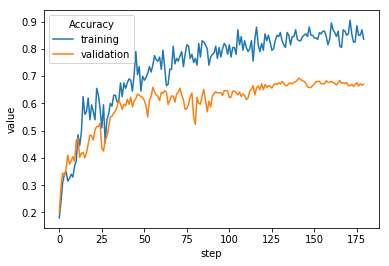

In [39]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cbook as cbook

fname = cbook.get_sample_data('/home/temporary/Downloads/training_acc.csv', asfileobj=False)

plt.plotfile(fname, ('step', 'value'), label = 'training')


fname2 = cbook.get_sample_data('/home/temporary/Downloads/test_acc.csv', asfileobj=False)

plt.plotfile(fname2, ('step', 'value'), label='validation', newfig=False)
plt.legend(title='Accuracy')
